In [1]:
import torch

In [3]:
check_2 = torch.load('/mnt/c/Users/Bruger/Desktop/Bachelor/GraphML_Bachelorprojekt/checkpoint/checkpoint_iter_64_2_5_epoch_4.pt')
paper_dict_2 = check_2['collected_embeddings']
paper_dict_2

/tmp/ipykernel_50537/3637772956.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  check = torch.load('/mnt/c/Users/Bruger/Desktop/Bachelor/GraphML_Bachelorprojekt/checkpoi

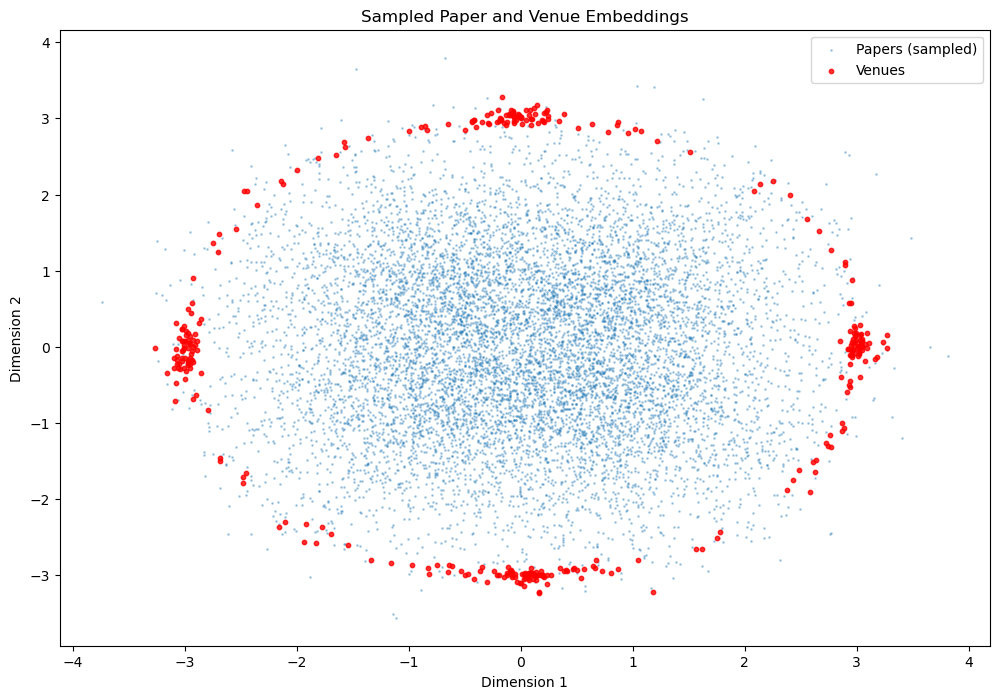

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

paper_embeddings = paper_dict_2['paper']
venue_embeddings = paper_dict_2.get('venue', {})

# Random sample indices for papers (if more than 10k)
paper_keys = list(paper_embeddings.keys())
sample_size = 10000
sampled_paper_keys = random.sample(paper_keys, sample_size) if len(paper_keys) > sample_size else paper_keys

# Convert to numpy
paper_points = np.array([paper_embeddings[k].detach().numpy() for k in sampled_paper_keys])

# Venues might be smaller, plot all or sample similarly
venue_keys = list(venue_embeddings.keys())
venue_points = np.array([venue_embeddings[k].detach().numpy() for k in venue_keys])

plt.figure(figsize=(12, 8))
plt.scatter(paper_points[:, 0], paper_points[:, 1], s=1, alpha=0.3, label='Papers (sampled)')
plt.scatter(venue_points[:, 0], venue_points[:, 1], s=10, alpha=0.8, color='red', label='Venues')
plt.legend()
plt.title('Sampled Paper and Venue Embeddings')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()


In [4]:
venue_value = torch.load("/mnt/c/Users/Bruger/Desktop/Bachelor/GraphML_Bachelorprojekt/dataset/ogbn_mag/processed/venue_value.pt")

/tmp/ipykernel_52380/174613636.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  venue_value = torch.load("/mnt/c/Users/Bruger/Desktop/Bachelor/GraphML_Bachelorprojekt/dat

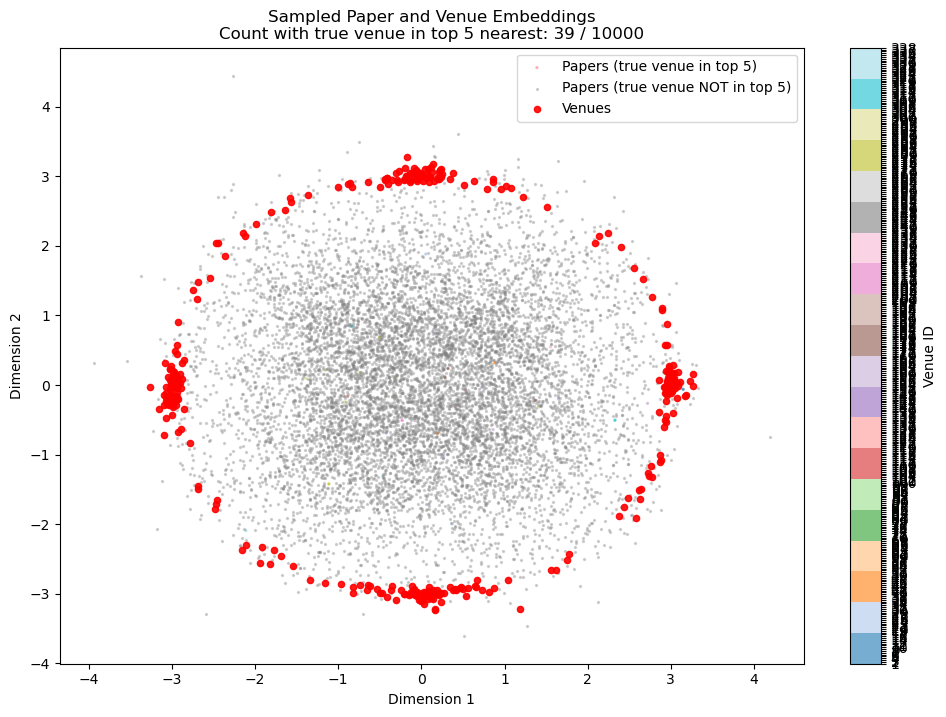

In [17]:
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.spatial import distance

paper_dict = check['collected_embeddings']
paper_embeddings = paper_dict['paper']
venue_embeddings = paper_dict.get('venue', {})

true_labels = {int(k): int(v) for k, v in venue_value.items()}  # paper_id -> true venue_id

# Sample papers for plotting
paper_keys = list(paper_embeddings.keys())
sample_size = 10000
sampled_paper_keys = random.sample(paper_keys, sample_size) if len(paper_keys) > sample_size else paper_keys

# Prepare venue embeddings array and map index -> venue_id
venue_ids = list(venue_embeddings.keys())
venue_points = np.array([venue_embeddings[k].detach().numpy() for k in venue_ids])

# Map venue_id to index in venue_points
venue_id_to_index = {vid: idx for idx, vid in enumerate(venue_ids)}

# Prepare color map for venues
unique_venues = list(set(true_labels.values()))
venue_to_color = {venue_id: idx for idx, venue_id in enumerate(unique_venues)}

paper_points = []
paper_colors = []
count_true_in_top5 = 0

for paper_id in sampled_paper_keys:
    paper_vec = paper_embeddings[paper_id].detach().numpy()
    paper_points.append(paper_vec)
    
    true_venue = true_labels.get(paper_id, None)
    if true_venue is None or true_venue not in venue_id_to_index:
        # No valid true label or venue embedding — color gray
        paper_colors.append(-1)
        continue

    # Compute distances to all venues
    dists = np.linalg.norm(venue_points - paper_vec, axis=1)
    
    # Find indices of 5 closest venues
    nearest_indices = np.argpartition(dists, 5)[:5]
    nearest_venues = [venue_ids[i] for i in nearest_indices]
    
    if true_venue in nearest_venues:
        # True venue is in top 5 closest
        paper_colors.append(venue_to_color[true_venue])
        count_true_in_top5 += 1
    else:
        paper_colors.append(-1)  # gray

paper_points = np.array(paper_points)
paper_colors = np.array(paper_colors)

plt.figure(figsize=(12, 8))

# Plot papers colored by condition (true venue in top 5 or gray)
mask = paper_colors != -1
scatter = plt.scatter(paper_points[mask, 0], paper_points[mask, 1], c=paper_colors[mask], s=2, alpha=0.6, cmap='tab20', label='Papers (true venue in top 5)')

# Papers without true venue in top 5 in gray
if np.any(paper_colors == -1):
    plt.scatter(paper_points[paper_colors == -1, 0], paper_points[paper_colors == -1, 1], s=2, alpha=0.3, color='gray', label='Papers (true venue NOT in top 5)')

# Plot venues in red
plt.scatter(venue_points[:, 0], venue_points[:, 1], s=20, alpha=0.9, color='red', label='Venues')

plt.legend()
plt.title(f'Sampled Paper and Venue Embeddings\nCount with true venue in top 5 nearest: {count_true_in_top5} / {len(sampled_paper_keys)}')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')

# Add colorbar for venue mapping
cbar = plt.colorbar(scatter, ticks=range(len(unique_venues)))
cbar.ax.set_yticklabels([str(v) for v in unique_venues])
cbar.set_label('Venue ID')

plt.show()


In [2]:
import torch
check_8 = torch.load('/mnt/c/Users/Bruger/Desktop/Bachelor/GraphML_Bachelorprojekt/checkpoint/checkpoint_iter_64_8_5_epoch_3.pt')
paper_dict_8 = check_8['collected_embeddings']
paper_dict_8

/tmp/ipykernel_52380/103819780.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  check_8 = torch.load('/mnt/c/Users/Bruger/Desktop/Bachelor/GraphML_Bachelorprojekt/checkpo

{'paper': {0: tensor([-22.0142,  19.4433, -27.3553,  12.8545,  19.5875,  13.3218, -26.7869,
           27.9453], requires_grad=True),
  2: tensor([-47.3116, -47.6028,  43.0273, -17.0106,  33.1945,  45.6570, -26.8202,
           19.2088], requires_grad=True),
  4: tensor([ -2.0553,  36.3735,   1.9278,  -5.7804, -30.3070, -20.8527,  40.4552,
          -22.9969], requires_grad=True),
  5: tensor([-33.6031,  10.0090, -47.5620, -34.0364, -26.9197,  10.5522,  -7.5822,
           -0.4292], requires_grad=True),
  6: tensor([-19.3874, -14.3568,  13.5347, -28.7551,  41.6339,  15.2527,  -6.9464,
           23.9166], requires_grad=True),
  7: tensor([-43.0898,  46.9112, -13.5446,  10.8703,   5.1491, -18.4988, -42.8589,
           39.4824], requires_grad=True),
  8: tensor([-45.0910,  10.2801, -22.5193, -21.2162, -44.2010,  19.2179,   2.5827,
           24.7785], requires_grad=True),
  10: tensor([  8.5560, -49.8240,  43.2000,  27.4119, -33.8948, -35.3469,  18.4688,
           49.4288], requires_gr

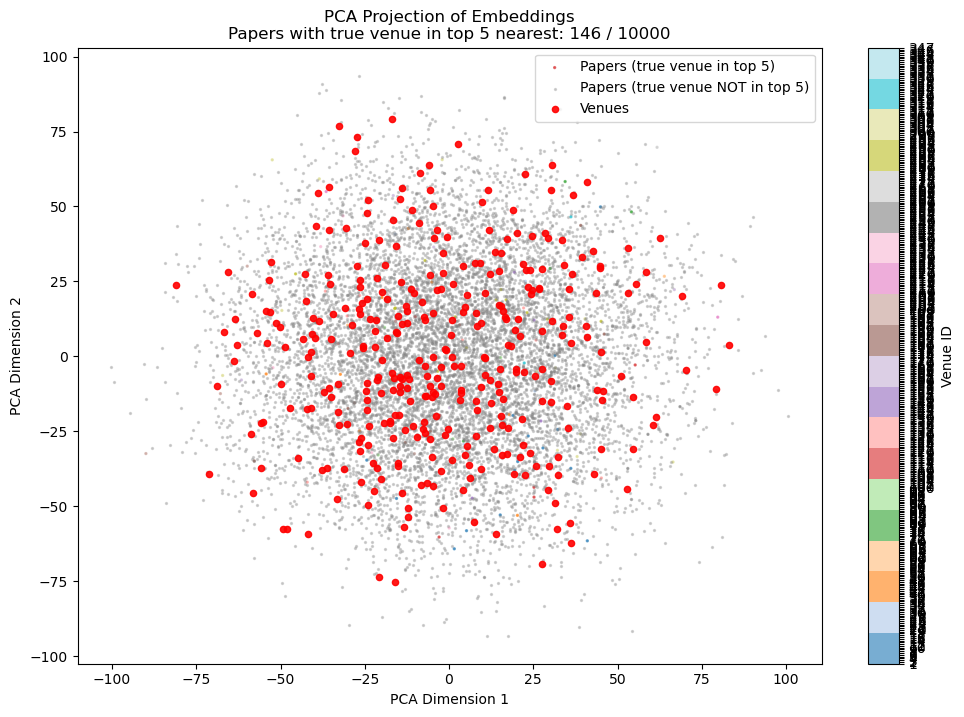

In [5]:
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.decomposition import PCA

paper_embeddings = paper_dict_8['paper']
venue_embeddings = paper_dict_8.get('venue', {})

# Your true labels dict: paper_id -> true venue_id
true_labels = {int(k): int(v) for k, v in venue_value.items()}  # make sure keys and values are ints

# Sample papers
paper_keys = list(paper_embeddings.keys())
sample_size = 10000
sampled_paper_keys = random.sample(paper_keys, sample_size) if len(paper_keys) > sample_size else paper_keys

# Prepare 8D numpy arrays for sampled papers and all venues
paper_points_8d = np.array([paper_embeddings[k].detach().numpy() for k in sampled_paper_keys])
venue_keys = list(venue_embeddings.keys())
venue_points_8d = np.array([venue_embeddings[k].detach().numpy() for k in venue_keys])

# Map venue_id to index in venue_points_8d
venue_id_to_index = {vid: idx for idx, vid in enumerate(venue_keys)}

# PCA fit on combined data for consistent 2D projection
combined_points = np.vstack([paper_points_8d, venue_points_8d])
pca = PCA(n_components=2)
pca.fit(combined_points)

# Transform paper and venue embeddings to 2D
paper_points_2d = pca.transform(paper_points_8d)
venue_points_2d = pca.transform(venue_points_8d)

# Prepare venue colors
unique_venues = list(set(true_labels.values()))
venue_to_color = {venue_id: idx for idx, venue_id in enumerate(unique_venues)}

paper_colors = []
count_true_in_top5 = 0

for idx, paper_id in enumerate(sampled_paper_keys):
    paper_vec_8d = paper_points_8d[idx]
    
    true_venue = true_labels.get(paper_id, None)
    if true_venue is None or true_venue not in venue_id_to_index:
        paper_colors.append(-1)  # gray if no label or missing venue embedding
        continue
    
    # Compute distances in original 8D space
    dists = np.linalg.norm(venue_points_8d - paper_vec_8d, axis=1)
    
    # Find 5 closest venues
    nearest_indices = np.argpartition(dists, 5)[:5]
    nearest_venues = [venue_keys[i] for i in nearest_indices]
    
    if true_venue in nearest_venues:
        paper_colors.append(venue_to_color[true_venue])
        count_true_in_top5 += 1
    else:
        paper_colors.append(-1)

paper_colors = np.array(paper_colors)

plt.figure(figsize=(12, 8))

# Papers with true venue in top 5 (colored)
mask = paper_colors != -1
scatter = plt.scatter(paper_points_2d[mask, 0], paper_points_2d[mask, 1], c=paper_colors[mask], s=2, alpha=0.6, cmap='tab20', label='Papers (true venue in top 5)')

# Papers without true venue in top 5 (gray)
if np.any(paper_colors == -1):
    plt.scatter(paper_points_2d[paper_colors == -1, 0], paper_points_2d[paper_colors == -1, 1], s=2, alpha=0.3, color='gray', label='Papers (true venue NOT in top 5)')

# Venues in red
plt.scatter(venue_points_2d[:, 0], venue_points_2d[:, 1], s=20, alpha=0.9, color='red', label='Venues')

plt.legend()
plt.title(f'PCA Projection of Embeddings\nPapers with true venue in top 5 nearest: {count_true_in_top5} / {len(sampled_paper_keys)}')
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')

# Colorbar for venue colors
cbar = plt.colorbar(scatter, ticks=range(len(unique_venues)))
cbar.ax.set_yticklabels([str(v) for v in unique_venues])
cbar.set_label('Venue ID')

plt.show()
